In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     6840 non-null   int64  
 1   Date           6840 non-null   object 
 2   HomeTeam       6840 non-null   object 
 3   AwayTeam       6840 non-null   object 
 4   FTHG           6840 non-null   int64  
 5   FTAG           6840 non-null   int64  
 6   FTR            6840 non-null   object 
 7   HTGS           6840 non-null   int64  
 8   ATGS           6840 non-null   int64  
 9   HTGC           6840 non-null   int64  
 10  ATGC           6840 non-null   int64  
 11  HTP            6840 non-null   float64
 12  ATP            6840 non-null   float64
 13  HM1            6840 non-null   object 
 14  HM2            6840 non-null   object 
 15  HM3            6840 non-null   object 
 16  HM4            6840 non-null   object 
 17  HM5            6840 non-null   object 
 18  AM1     

In [3]:
def plot_correlation_matrix(df):
    df_numeric = df.select_dtypes(include=['float64', 'int64'])
    if len(df_numeric.columns) > 0:
        
        correlation_matrix = df_numeric.corr()
        plt.figure(figsize=(20, 10))
        sns.heatmap(correlation_matrix, 
                annot=True, 
                linewidths=0.5, 
                cmap="YlGnBu")
        plt.title('Matrice de corrélation')
        plt.show()
    else:
        print('Aucune variable numérique dans ce DataFrame')

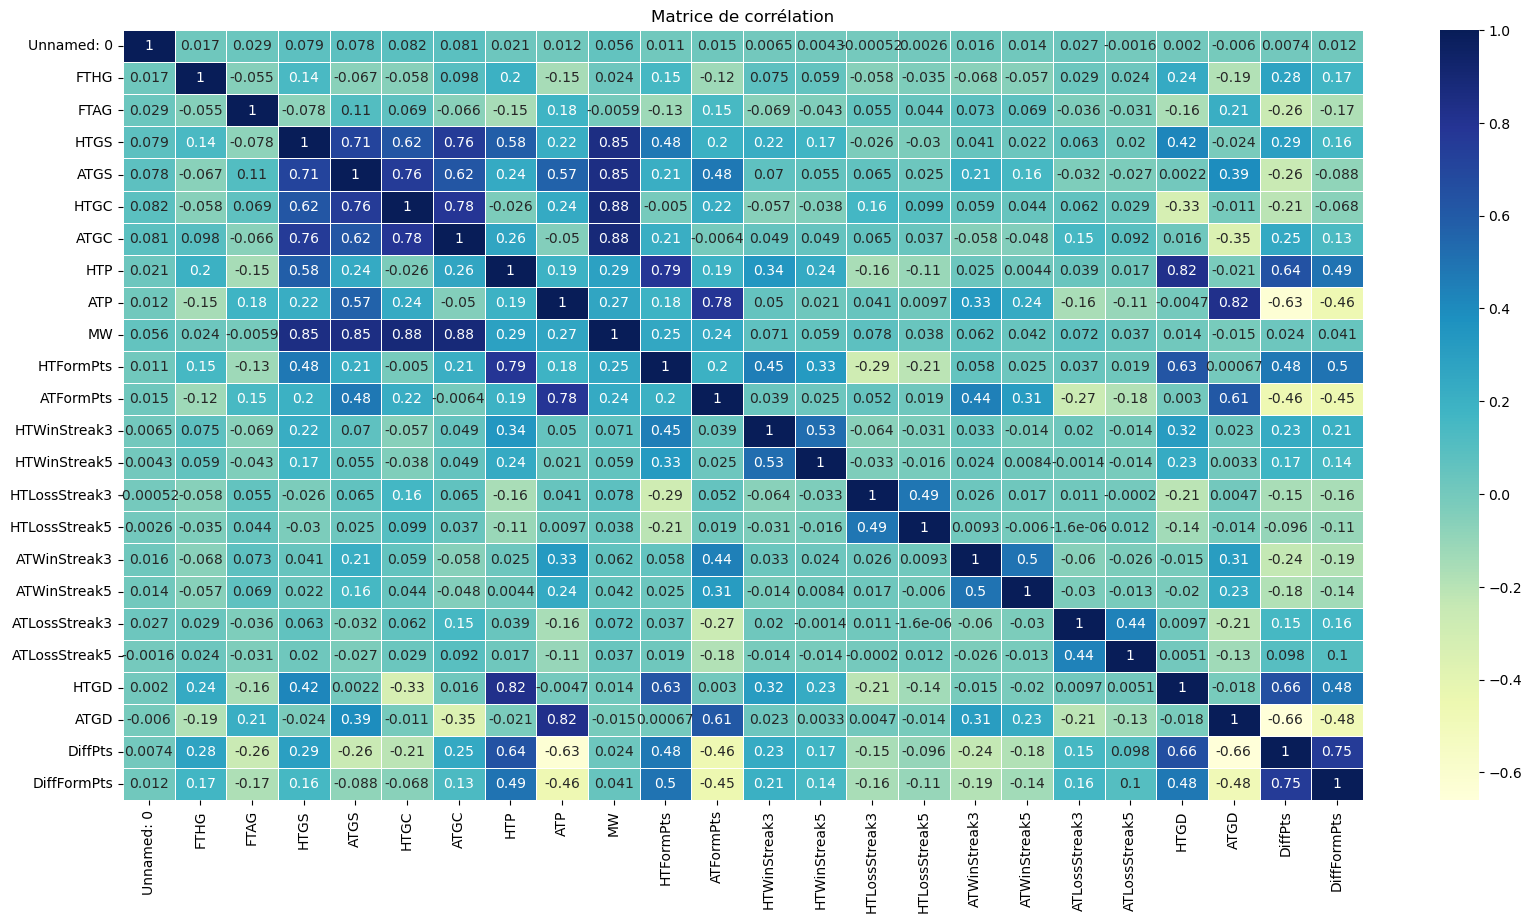

In [4]:
plot_correlation_matrix(data)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

In [6]:
team = pd.read_csv('team_dict.csv')
team_dict = dict(zip(team.Team, team.ID))
print(team_dict)

{'Crystal Palace': 0, 'Newcastle': 1, 'Arsenal': 2, 'Charlton': 3, 'Everton': 4, 'Bolton': 5, 'Sheffield United': 6, 'Stoke': 7, 'Hull': 8, 'Blackburn': 9, 'Bournemouth': 10, 'Man United': 11, 'Fulham': 12, 'Middlesbrough': 13, 'Man City': 14, 'Middlesboro': 15, 'Wolves': 16, 'Liverpool': 17, 'Aston Villa': 18, 'Norwich': 19, 'Leicester': 20, 'Sunderland': 21, 'Bradford': 22, 'Brighton': 23, 'Wigan': 24, 'Burnley': 25, 'Derby': 26, 'Tottenham': 27, 'West Ham': 28, 'Birmingham': 29, 'Ipswich': 30, 'Portsmouth': 31, 'Coventry': 32, 'Southampton': 33, 'QPR': 34, 'Reading': 35, 'Swansea': 36, 'Blackpool': 37, 'Huddersfield': 38, 'Cardiff': 39, 'West Brom': 40, 'Chelsea': 41, 'Leeds': 42, 'Watford': 43}


In [7]:
data['HomeTeam'] = data['HomeTeam'].map(team_dict)
data['AwayTeam'] = data['AwayTeam'].map(team_dict)
data['FTR'] = data['FTR'].apply(lambda x: 1 if x == 'H' else 0)
print(data)

      Unnamed: 0        Date  HomeTeam  AwayTeam  FTHG  FTAG  FTR  HTGS  ATGS  \
0              0  19/08/2000         3        14     4     0    1     0     0   
1              1  19/08/2000        41        28     4     2    1     0     0   
2              2  19/08/2000        32        13     1     3    0     0     0   
3              3  19/08/2000        26        33     2     2    0     0     0   
4              4  19/08/2000        42         4     2     0    1     0     0   
...          ...         ...       ...       ...   ...   ...  ...   ...   ...   
6835        6835  13/05/2018         1        41     3     0    1    36    62   
6836        6836  13/05/2018        33        14     0     1    0    37   105   
6837        6837  13/05/2018        36         7     1     2    0    27    33   
6838        6838  13/05/2018        27        20     5     4    1    69    52   
6839        6839  13/05/2018        28         4     3     1    1    45    43   

      HTGC  ...  HTLossStre

In [8]:
features = ['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTGS', 'ATGS', 'HTGC'
            , 'ATGC', 'HTP', 'ATP', 'MW', 'HTFormPts', 'ATFormPts'
            , 'HTWinStreak3', 'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5'
            , 'ATWinStreak3', 'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5'
            , 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts']
X = data[features]
y = data['FTR']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

clf = RandomForestClassifier(n_estimators = 200, random_state = 42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
# Calculation accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy: .4f}')

joblib.dump(clf, 'Random_forest.sav')

In [11]:
model = joblib.load('Random_forest.sav')

# Vérifiez le type de modèle
if isinstance(model, RandomForestClassifier):
    # Obtenez les importances des caractéristiques
    feature_importances = model.feature_importances_
    print("Importances des caractéristiques :", feature_importances)
    
    # Pour accéder aux arbres individuels dans la forêt
    estimators = model.estimators_
    print(f"Nombre d'arbres dans la forêt : {len(estimators)}")
    
    # Si vous voulez voir les paramètres d'un arbre spécifique
    for i, tree in enumerate(estimators):
        print(f"Arbre {i+1}:")
        print(tree.tree_)  # Affiche les informations sur l'arbre
else:
    print("Le modèle chargé n'est pas une forêt aléatoire.")

Importances des caractéristiques : [1.27727683e-02 1.24642928e-02 4.67058453e-01 2.97981099e-01
 1.27496725e-02 1.22510950e-02 1.16530845e-02 1.17157088e-02
 1.98237644e-02 1.79676683e-02 9.37411112e-03 9.19672266e-03
 9.36668452e-03 7.46918684e-04 2.16450209e-04 7.51948060e-04
 2.32331262e-04 7.83696857e-04 2.20577538e-04 7.15717238e-04
 2.19384277e-04 1.91282029e-02 2.13388261e-02 3.13603382e-02
 1.99104837e-02]
Nombre d'arbres dans la forêt : 200
Arbre 1:
Arbre 2:
Arbre 3:
Arbre 4:
Arbre 5:
Arbre 6:
Arbre 7:
Arbre 8:
Arbre 9:
Arbre 10:
Arbre 11:
Arbre 12:
Arbre 13:
Arbre 14:
Arbre 15:
Arbre 16:
Arbre 17:
Arbre 18:
Arbre 19:
Arbre 20:
Arbre 21:
Arbre 22:
Arbre 23:
Arbre 24:
Arbre 25:
Arbre 26:
Arbre 27:
Arbre 28:
Arbre 29:
Arbre 30:
Arbre 31:
Arbre 32:
Arbre 33:
Arbre 34:
Arbre 35:
Arbre 36:
Arbre 37:
Arbre 38:
Arbre 39:
Arbre 40:
Arbre 41:
Arbre 42:
Arbre 43:
Arbre 44:
Arbre 45:
Arbre 46:
Arbre 47:
Arbre 48:
Arbre 49:
Arbre 50:
Arbre 51:
Arbre 52:
Arbre 53:
Arbre 54:
Arbre 55:
Arbre

c:\Users\sweez\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\sweez\anaconda3\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
